In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

In [2]:
# ===============================
# 2. Load Dataset
# ===============================
# Replace with your dataset
df = pd.read_csv("./data/dataset.csv")

TARGET = "Label"

X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Original feature count:", X.shape[1])

Original feature count: 1420


In [3]:
# ===============================
# 3. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [4]:
# ===============================
# 4. BASELINE MODEL (No Reduction)
# ===============================

# ---- Scaling ----
scaler_baseline = StandardScaler()
X_train_scaled = scaler_baseline.fit_transform(X_train)
X_test_scaled = scaler_baseline.transform(X_test)

# ---- Classification ----
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

baseline_pred = baseline_model.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, baseline_pred)

In [5]:
# ===============================
# 5. FEATURE SELECTION MODEL
# ===============================
K = 100  # number of selected features

# ---- Scaling ----
scaler_fs = StandardScaler()
X_train_scaled_fs = scaler_fs.fit_transform(X_train)
X_test_scaled_fs = scaler_fs.transform(X_test)

# ---- Feature Selection (fit ONLY on train) ----
selector = SelectKBest(score_func=f_classif, k=K)
X_train_fs = selector.fit_transform(X_train_scaled_fs, y_train)
X_test_fs = selector.transform(X_test_scaled_fs)

print("Selected feature count (FS):", X_train_fs.shape[1])

Selected feature count (FS): 100


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [   1    2    3    4    5    7    8    9   10   11   13   14   15   16
   17   19   20   21   22   23   25   26   27   28   29   31   32   33
   34   35   37   38   39   40   41   43   44   45   46   47   49   50
   51   52   53  217  218  219  220  221  223  224  225  226  227  229
  230  231  232  233  235  236  237  238  239  241  242  243  244  245
  247  248  249  250  251  253  254  255  256  257  259  260  261  262
  263  265  266  267  268  269  864  865  866  867  868  869 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1176 1177 1178 1179
 1180 1181 1182 1183 1184 1185 1186 1187 1190 1192 1193] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: R

In [6]:
# ---- Classification ----
fs_model = LogisticRegression(max_iter=1000)
fs_model.fit(X_train_fs, y_train)

fs_pred = fs_model.predict(X_test_fs)
fs_acc = accuracy_score(y_test, fs_pred)

In [ ]:
# ===============================
# 6. PCA MODEL
# ===============================

# ---- Scaling ----
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train)
X_test_scaled_pca = scaler_pca.transform(X_test)

# ---- PCA (fit ONLY on train) ----
pca = PCA(n_components=K)
X_train_pca = pca.fit_transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)

print("Reduced dimensions (PCA):", X_train_pca.shape[1])


Reduced dimensions (PCA): 1000


In [17]:
# ---- Classification ----
pca_model = LogisticRegression(max_iter=1000)
pca_model.fit(X_train_pca, y_train)

pca_pred = pca_model.predict(X_test_pca)
pca_acc = accuracy_score(y_test, pca_pred)

In [ ]:
# ===============================
# 7. Results Comparison
# ===============================
print("\n===== Model Comparison =====")
print(f"Baseline Accuracy        : {baseline_acc:.4f}")
print(f"Feature Selection Acc    : {fs_acc:.4f}")
print(f"PCA Accuracy             : {pca_acc:.4f}")


===== Model Comparison =====
Baseline Accuracy        : 0.9831
Feature Selection Acc    : 0.9792
PCA Accuracy             : 0.9857


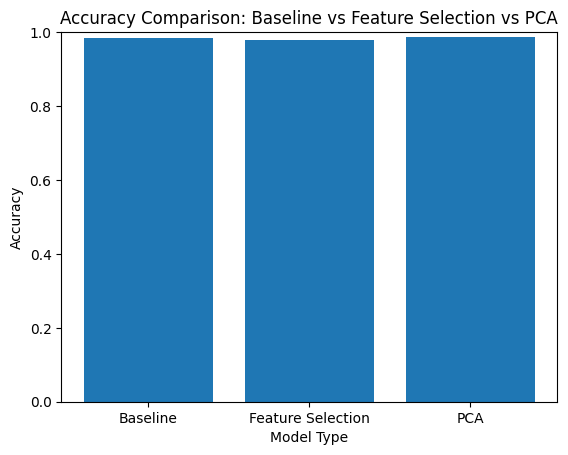

In [15]:
# ===============================
# 8. VISUAL COMPARISON
# ===============================
models = ["Baseline", "Feature Selection", "PCA"]
accuracies = [baseline_acc, fs_acc, pca_acc]

plt.figure()
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Baseline vs Feature Selection vs PCA")

plt.show()
